In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [12]:
file_url = "https://raw.githubusercontent.com/Ahmedtarrek4/Sales-dataset-/main/stores_sales_forecasting%20(1).csv" 
df = pd.read_csv(file_url, encoding="ISO-8859-1")
df.replace([np.inf, -np.inf], np.nan, inplace=True)  
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region       Product ID

In [14]:
# Check for missing values
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


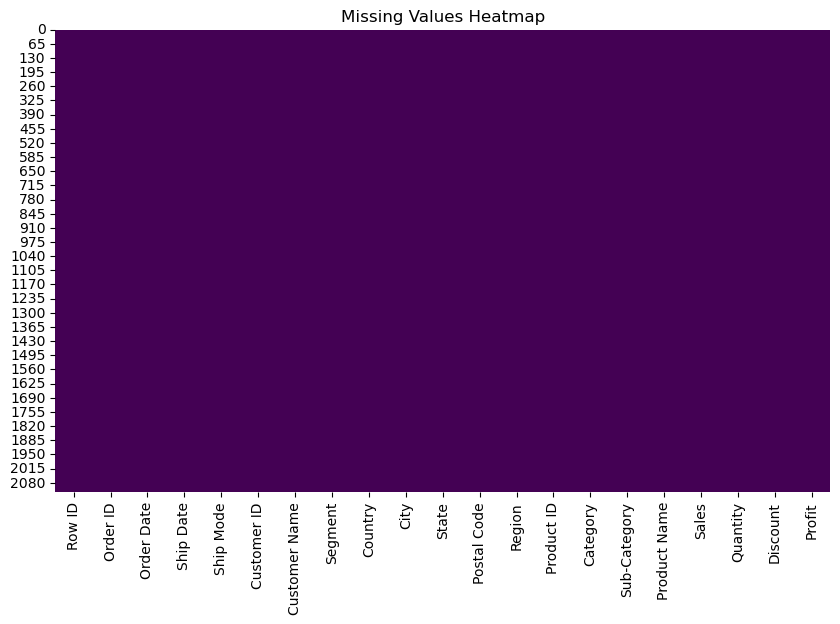

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [113]:
#checking duplicate values 
df.nunique()

Order Date       467
Ship Date        494
Ship Mode          4
Customer Name    438
Segment            3
Country            1
City             203
State             43
Postal Code      254
Region             4
Category           1
Sub-Category       4
Product Name     208
Sales            502
Quantity           7
Discount           5
Profit           534
Order Month       12
Order Year         4
Profit Margin    155
dtype: int64

In [16]:
# Check for duplicates
print(df.duplicated().sum())

0


In [18]:
# Summarize basic statistics
print(df.describe())

            Row ID   Postal Code        Sales     Quantity     Discount  \
count  2121.000000   2121.000000  2121.000000  2121.000000  2121.000000   
mean   5041.643564  55726.556341   349.834887     3.785007     0.173923   
std    2885.740258  32261.888225   503.179145     2.251620     0.181547   
min       1.000000   1040.000000     1.892000     1.000000     0.000000   
25%    2568.000000  22801.000000    47.040000     2.000000     0.000000   
50%    5145.000000  60505.000000   182.220000     3.000000     0.200000   
75%    7534.000000  90032.000000   435.168000     5.000000     0.300000   
max    9991.000000  99301.000000  4416.174000    14.000000     0.700000   

            Profit  
count  2121.000000  
mean      8.699327  
std     136.049246  
min   -1862.312400  
25%     -12.849000  
50%       7.774800  
75%      33.726600  
max    1013.127000  


In [30]:
# 3. Preprocessing and Feature Engineering
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [101]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

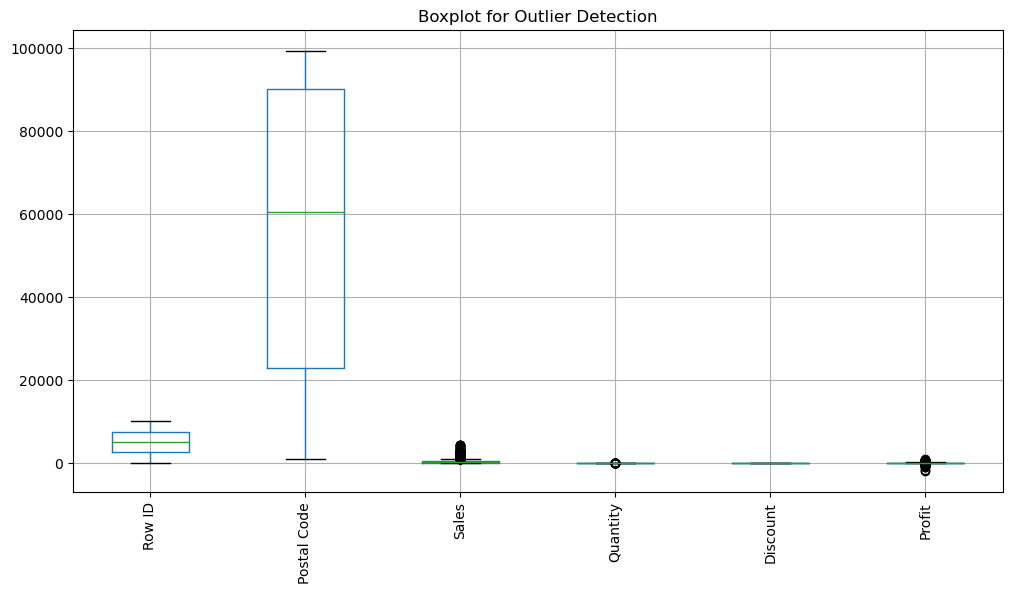

In [34]:
plt.figure(figsize=(12, 6))
df.boxplot(rot=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [95]:
def handle_outliers(df):
    num_cols = df.select_dtypes(include=[np.number]).columns   
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
df = handle_outliers(df)

In [97]:
print("number of rows before removing outliers:", df.shape[0])  
df = handle_outliers(df) 
print("number of rows after removing outliers:", df.shape[0])

number of rows before removing outliers: 673
number of rows after removing outliers: 671


In [105]:
print("\nMissing Values After Handling:")
print(df.isnull().sum())  # Added closing parenthesis here


Missing Values After Handling:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [109]:
# Create new features
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Profit Margin'] = df['Profit'] / df['Sales']

In [111]:
df = df.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Product ID'])

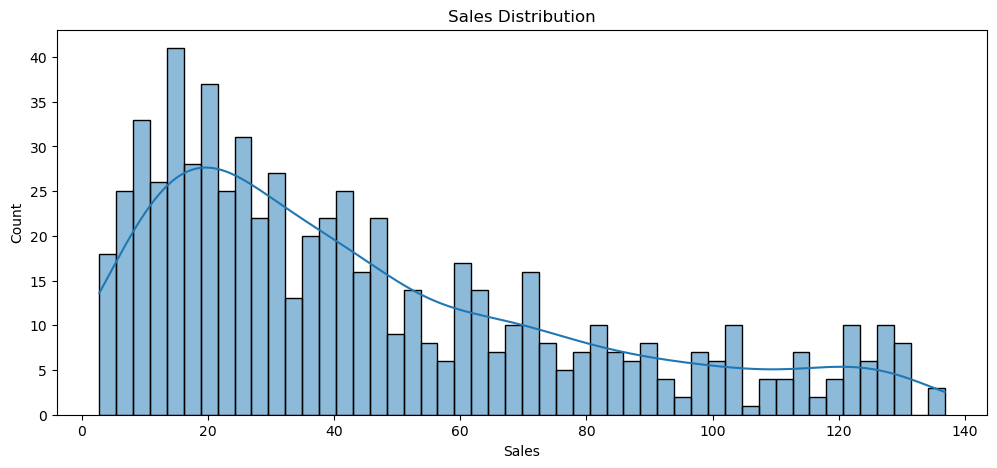

In [117]:
# 4. Exploratory Data Analysis (EDA)
## sales distribution 
plt.figure(figsize=(12, 5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.show()

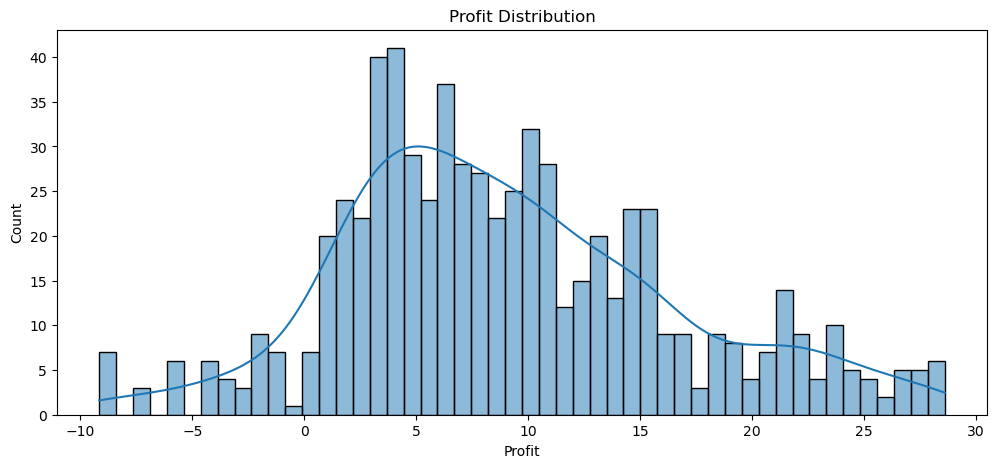

In [119]:
## profit distribution 
plt.figure(figsize=(12, 5))
sns.histplot(df['Profit'], bins=50, kde=True)
plt.title("Profit Distribution")
plt.show()

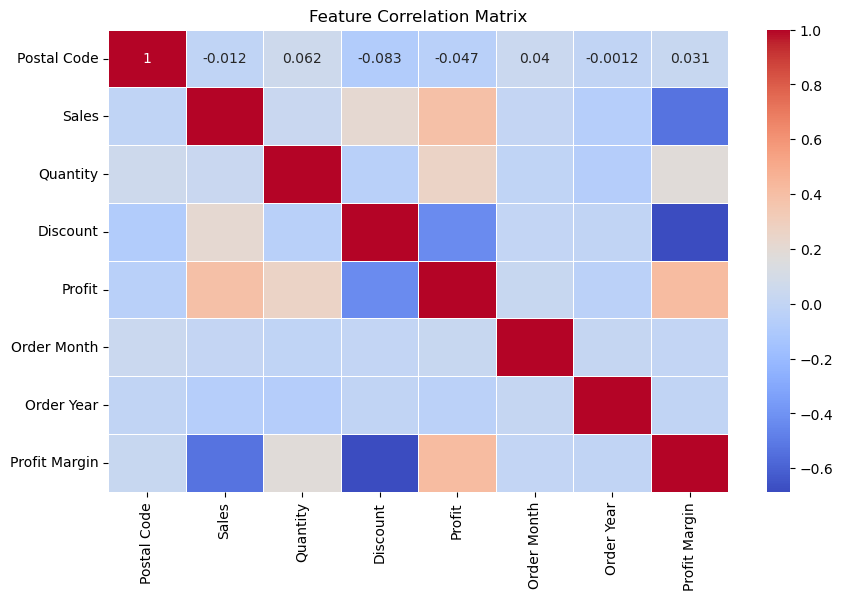

In [127]:
# Correlation Matrix

numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

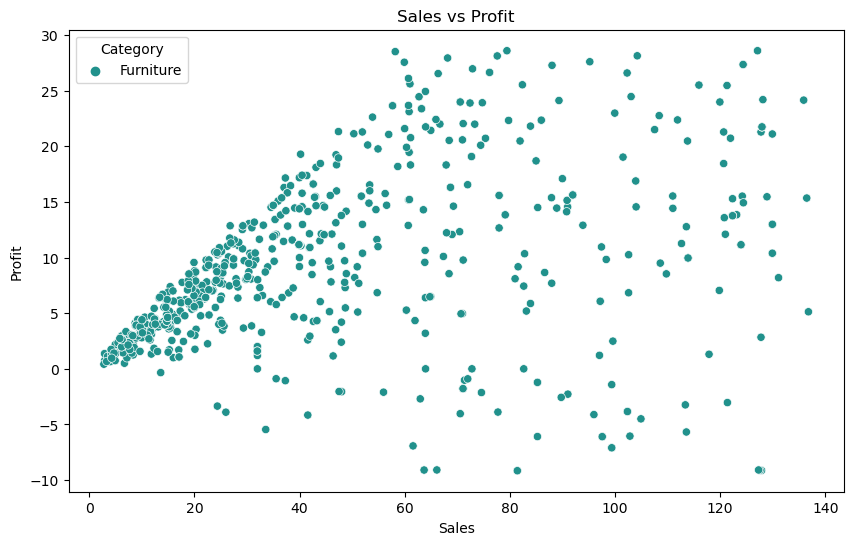

In [129]:
# Bivariate Analysis
# Sales vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category', palette='viridis')
plt.title("Sales vs Profit")
plt.show()

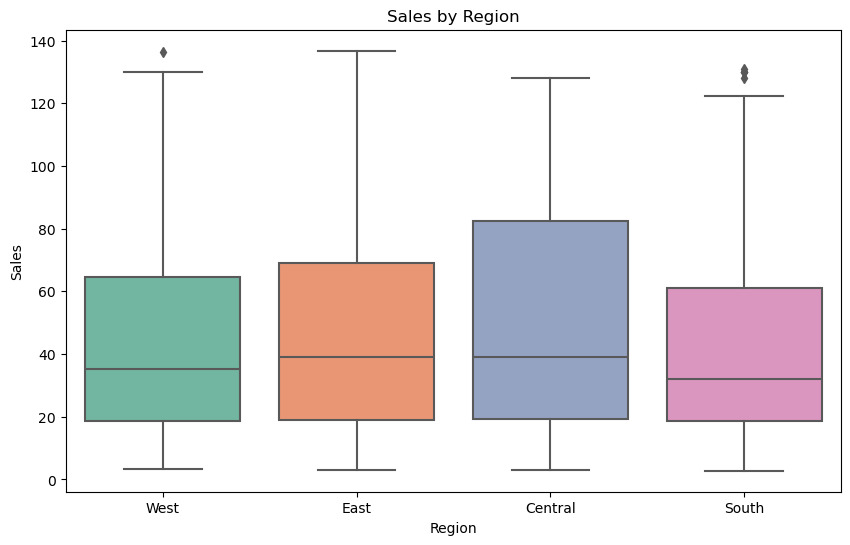

In [131]:
# Sales by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Sales', data=df, palette='Set2')
plt.title("Sales by Region")
plt.show()

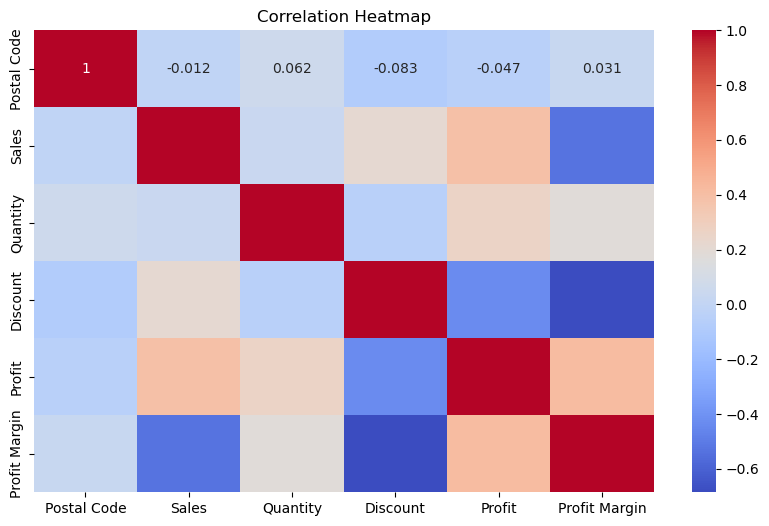

Numerical columns being used: ['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit', 'Profit Margin']


In [135]:
# Multivariate Analysis
# First, let's identify the correct numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# If you want to see what columns are actually being used, you can print them:
print("Numerical columns being used:", list(numerical_cols))

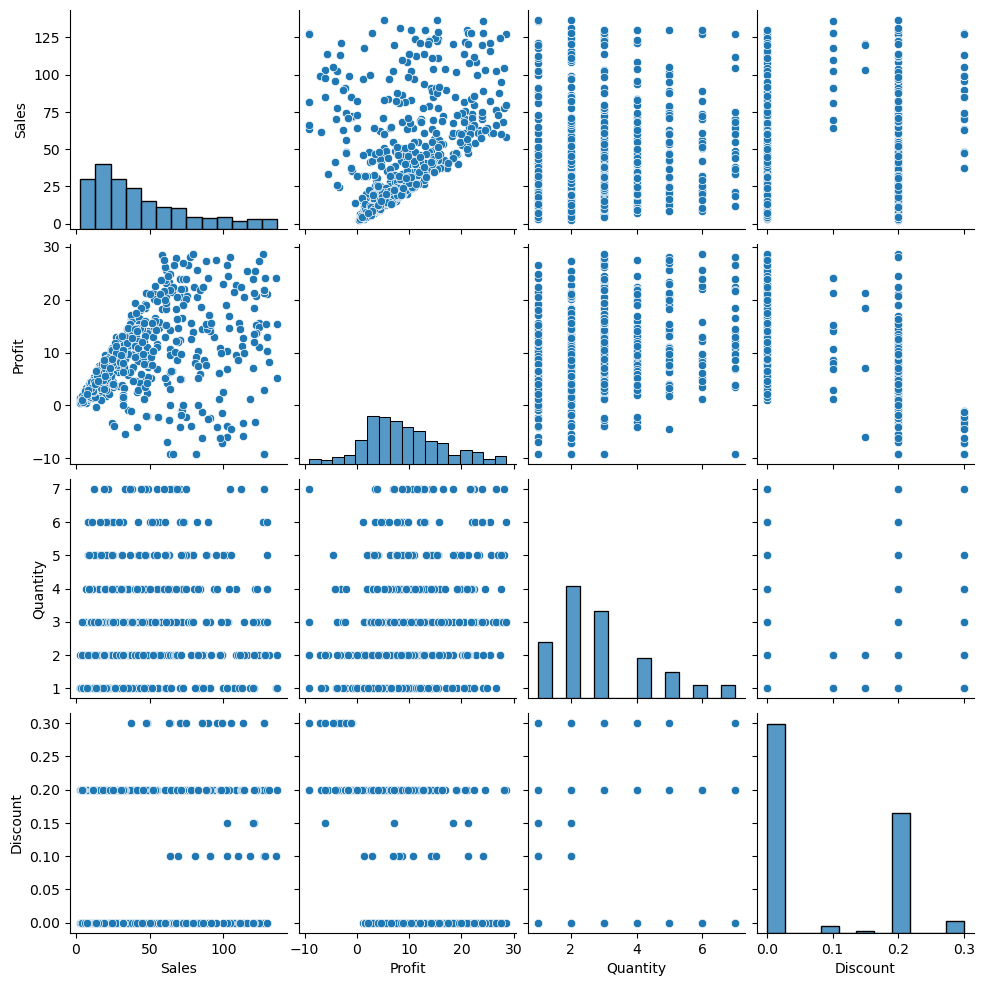

In [137]:
# Pair Plot for Numerical Features
sns.pairplot(df[['Sales', 'Profit', 'Quantity', 'Discount']])
plt.show()

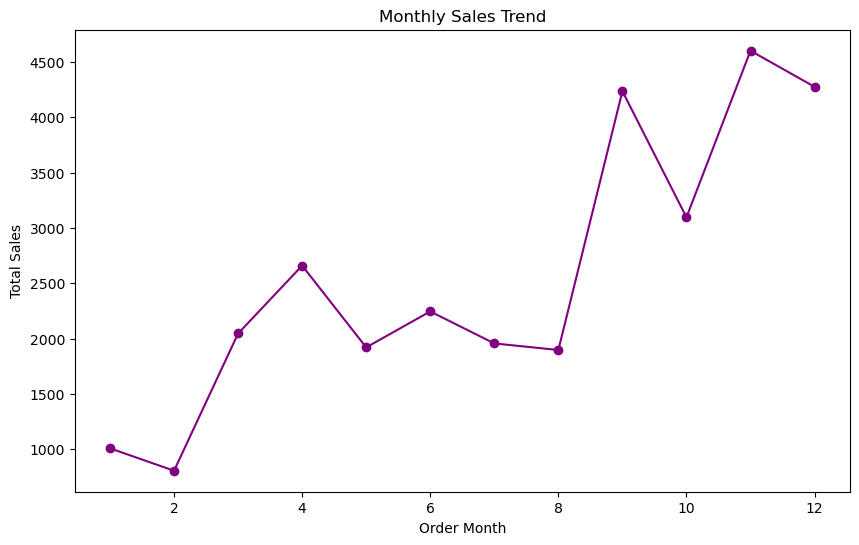

In [139]:
# Time Series Analysis
# Monthly Sales Trend
monthly_sales = df.groupby('Order Month')['Sales'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title("Monthly Sales Trend")
plt.xlabel("Order Month")
plt.ylabel("Total Sales")
plt.show()

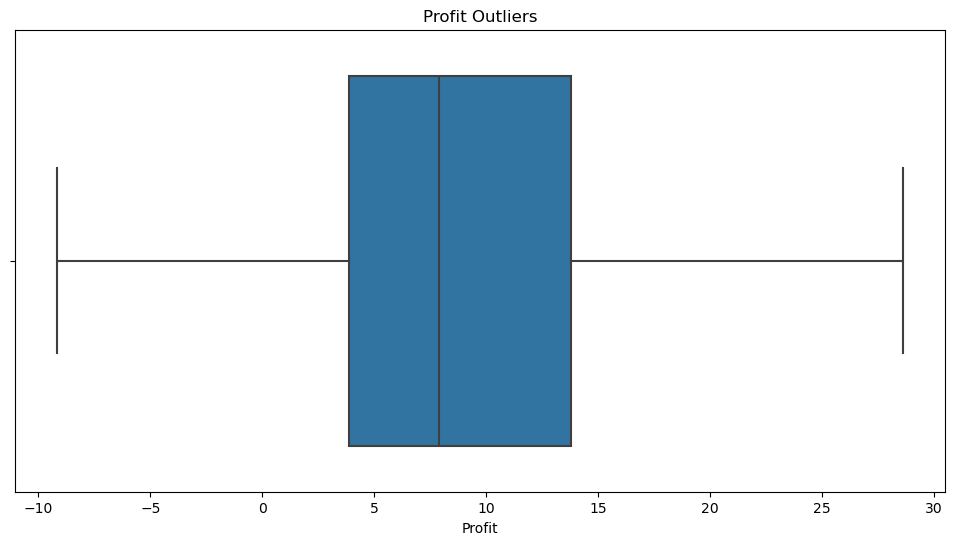

In [141]:
# Bokplot for outliers

### for profit column

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Profit'])
plt.title("Profit Outliers")
plt.show()

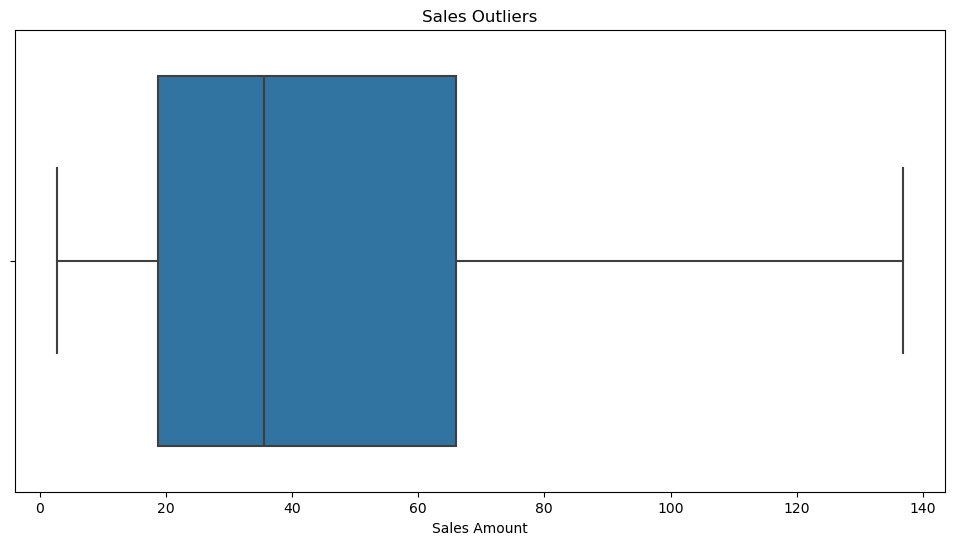

In [143]:
### for sales columns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Sales'])
plt.title("Sales Outliers")
plt.xlabel("Sales Amount")
plt.show()

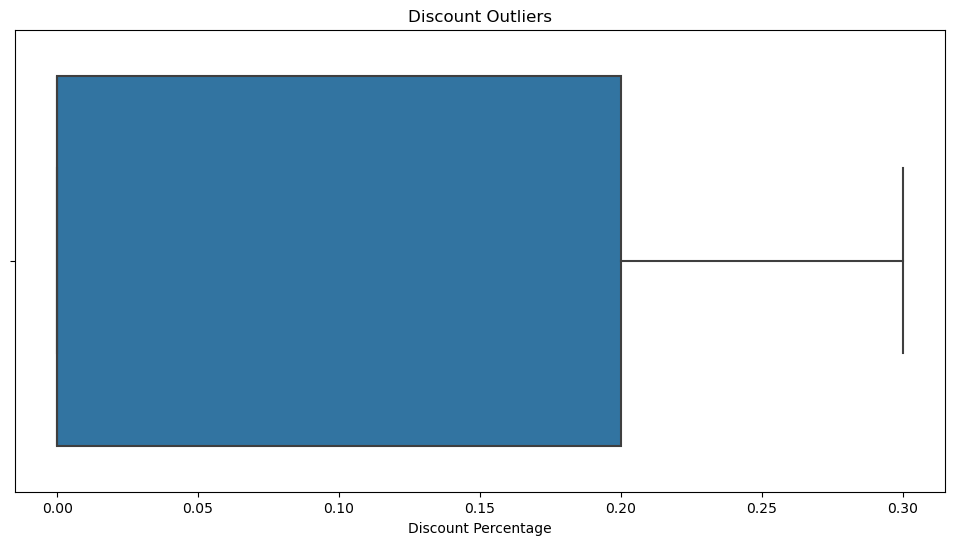

In [145]:
### for Discount columns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Discount'])
plt.title("Discount Outliers")
plt.xlabel("Discount Percentage")
plt.show()

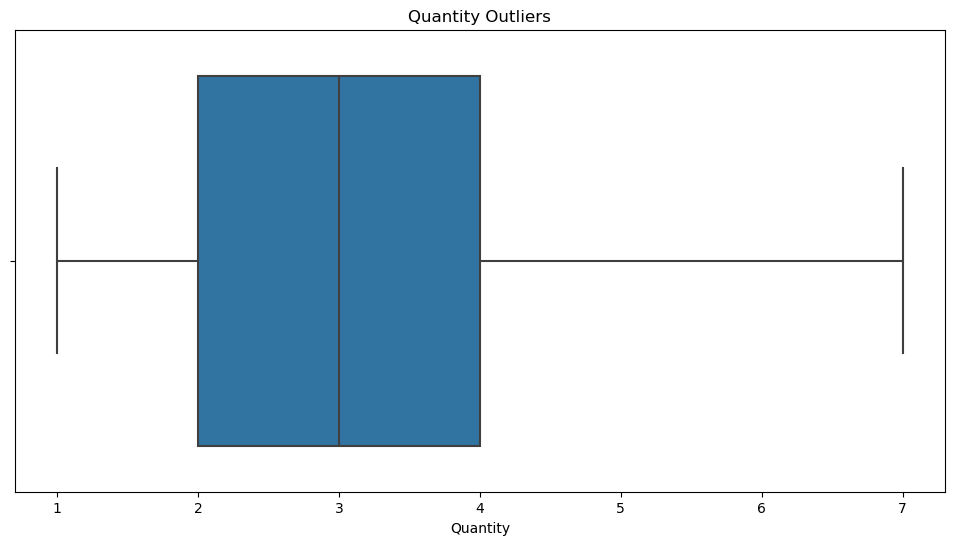

In [147]:
### for quantity columns 

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Quantity'])
plt.title("Quantity Outliers")
plt.xlabel("Quantity")
plt.show()

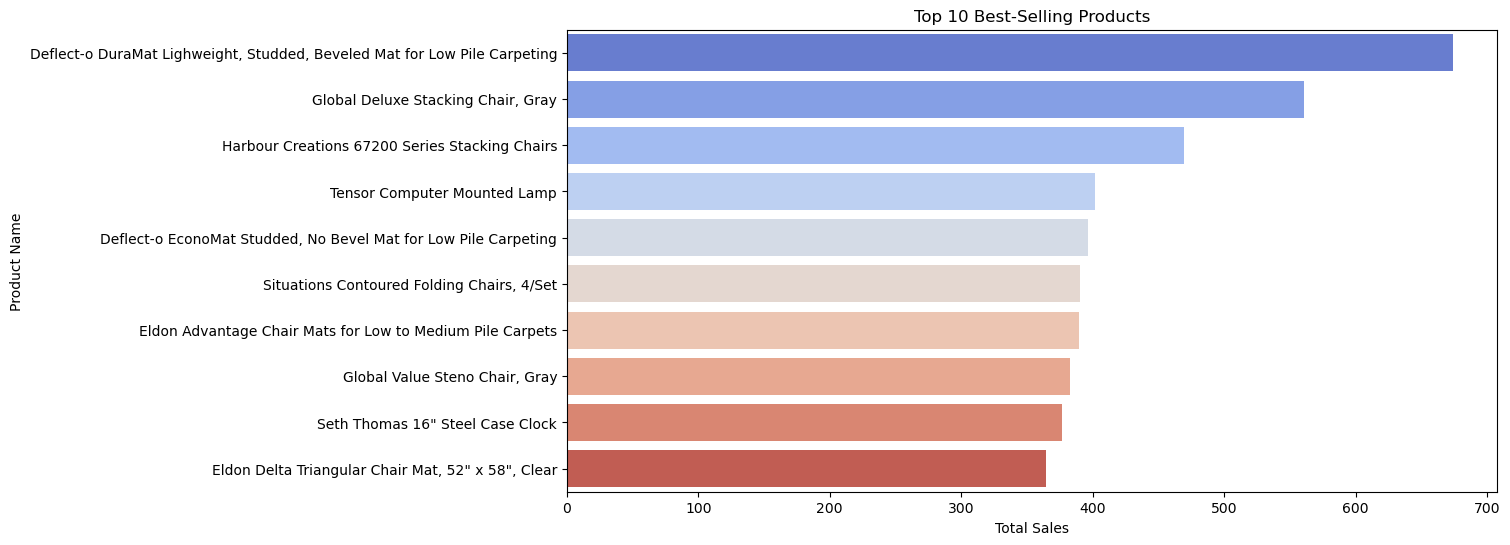

In [151]:
# products 

## Top Selling Products
top_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()

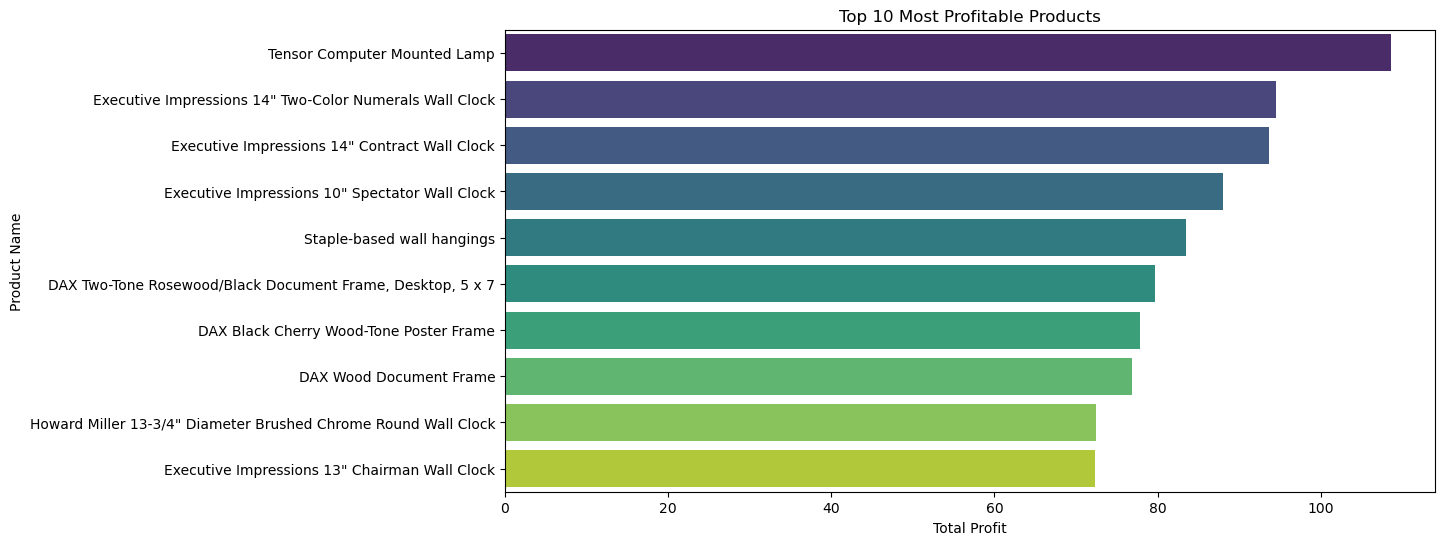

In [153]:
# Most Profitable Products
profitable_products = df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=profitable_products.values, y=profitable_products.index, palette='viridis')
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Total Profit")
plt.ylabel("Product Name")
plt.show()

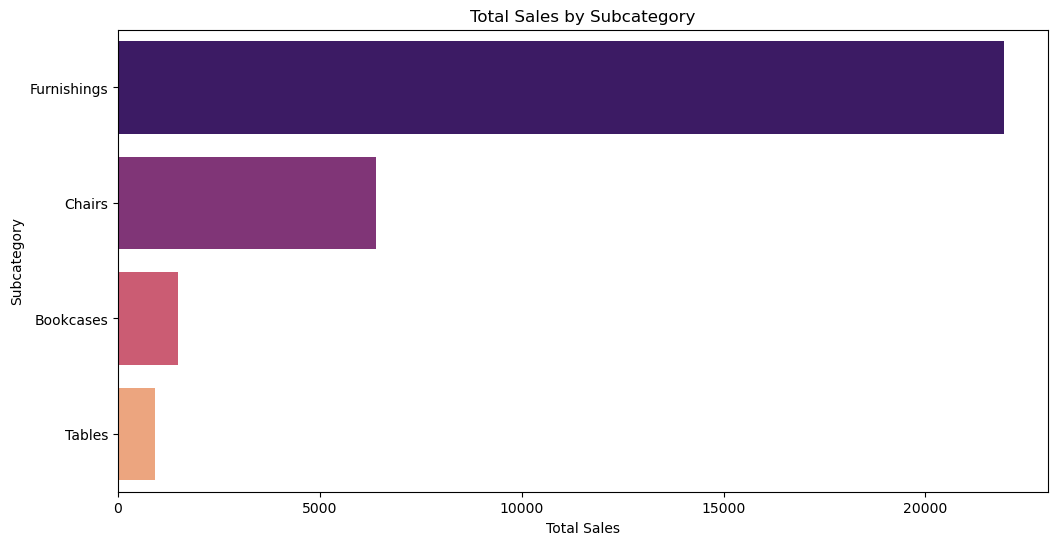

In [155]:
# Sales Analysis by Subcategory
subcategory_sales = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=subcategory_sales.values, y=subcategory_sales.index, palette='magma')
plt.title("Total Sales by Subcategory")
plt.xlabel("Total Sales")
plt.ylabel("Subcategory")
plt.show()

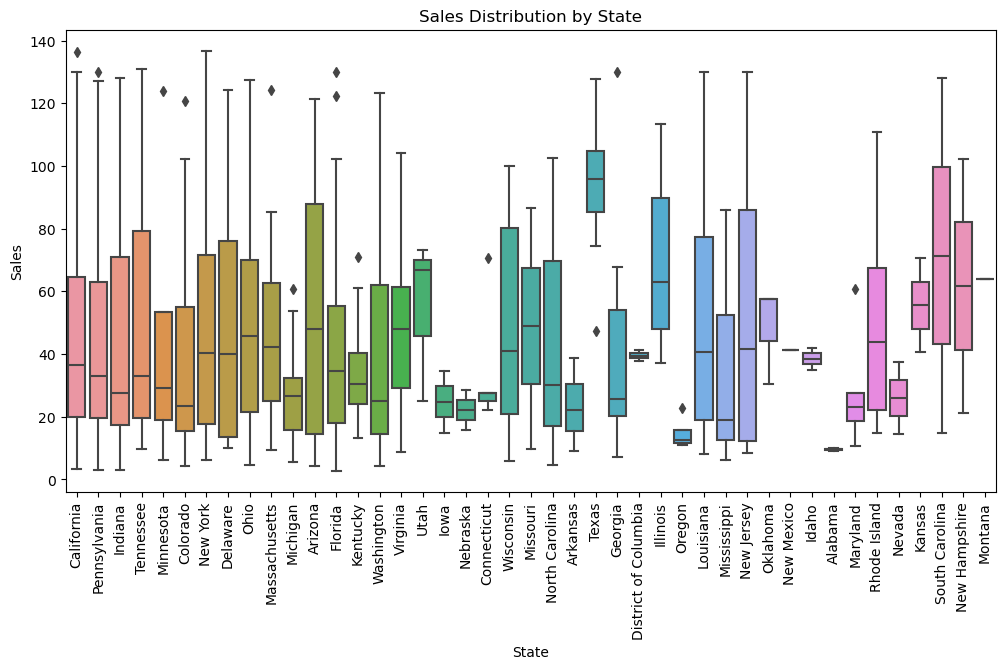

In [157]:
# sales distrubution by state
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['State'], y=df['Sales'])
plt.title("Sales Distribution by State")
plt.xlabel("State")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()

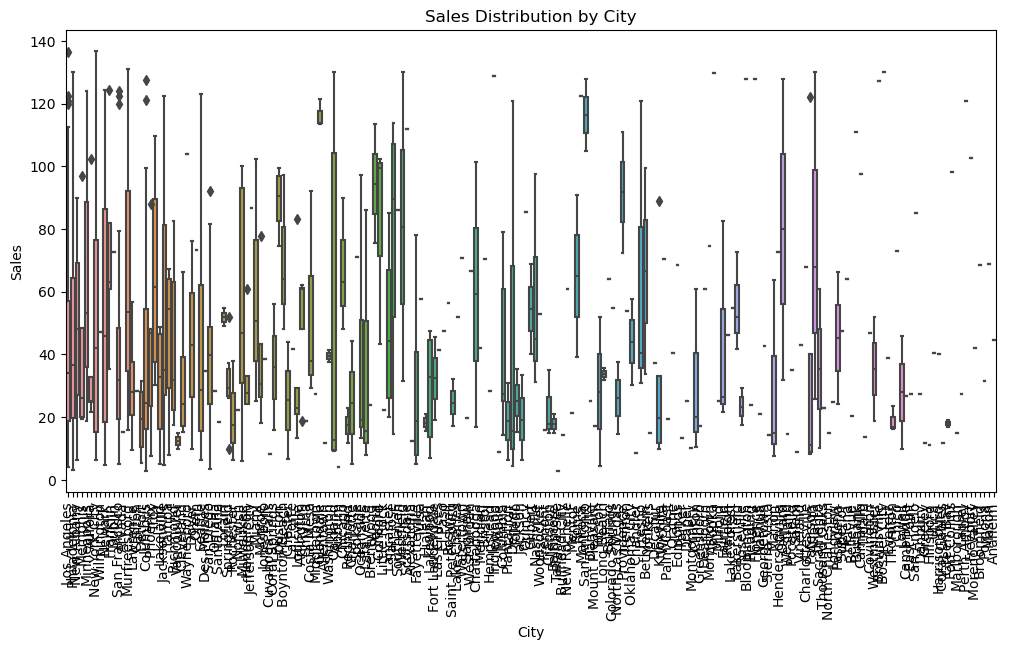

In [159]:
# Sales Distribution by City
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['City'], y=df['Sales'])
plt.title("Sales Distribution by City")
plt.xlabel("City")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()